Extracting LBP Features: 100%|█████████████████████████████████████████████████████| 1318/1318 [04:49<00:00,  4.55it/s]
C:\Users\Hp\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Hp\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Hp\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

Accuracy: 0.42
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.50      0.32      0.39        19
           2       0.33      0.44      0.38        34
           3       0.48      0.56      0.52        45
           4       0.40      0.44      0.42        55
           5       0.50      0.15      0.24        13
           6       0.00      0.00      0.00         3
           7       0.33      0.20      0.25        15
           8       0.43      0.51      0.47        49
           9       0.50      0.32      0.39        31

    accuracy                           0.42       264
   macro avg       0.35      0.29      0.30       264
weighted avg       0.43      0.42      0.41       264



Testing different values of k: 100%|████████████████████████████████████████████████████| 5/5 [00:00<00:00, 110.60it/s]


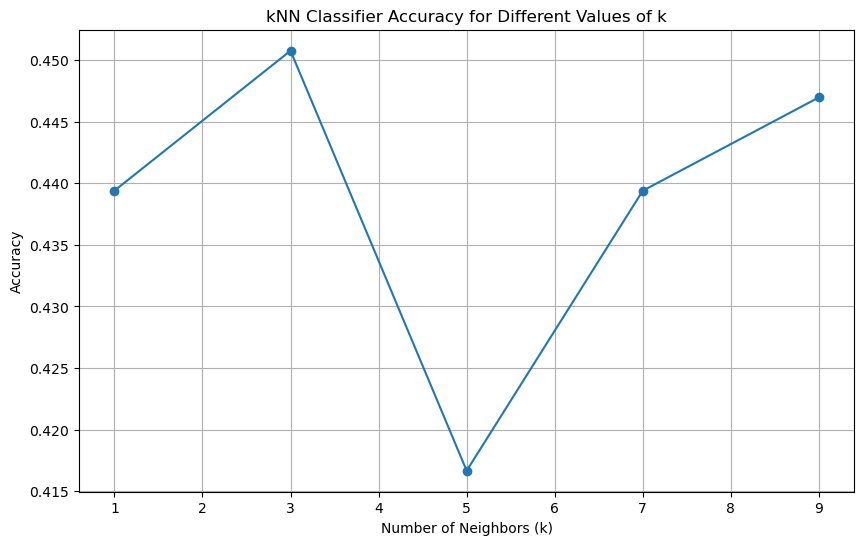

ValueError: y contains previously unseen labels: 'Yoga'

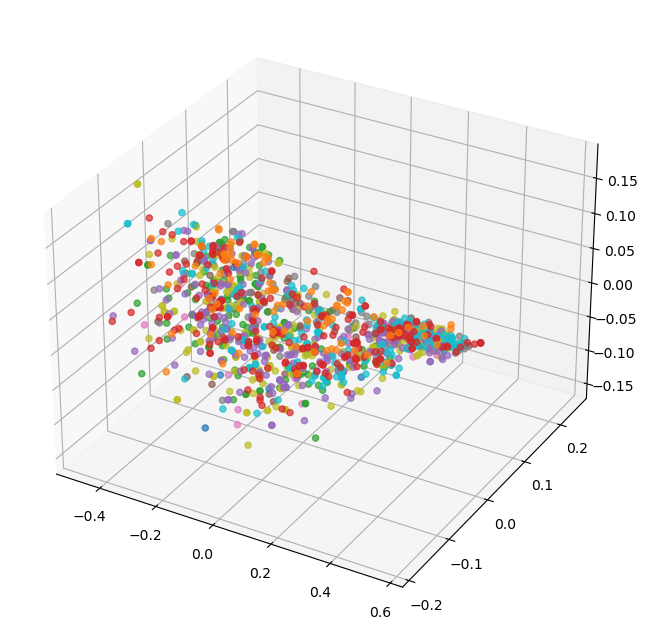

In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from mpl_toolkits.mplot3d import Axes3D
from skimage import feature as sk_feature
from tqdm import tqdm
import os

# Function to extract LBP features from an image
def extract_lbp_features(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    # Compute LBP features
    lbp = sk_feature.local_binary_pattern(gray, P=8, R=1, method='uniform')
    # Compute histogram of LBP and normalize
    hist, _ = np.histogram(lbp.ravel(), bins=np.arange(0, 59), range=(0, 58))
    hist = hist.astype("float")
    hist /= (hist.sum() + 1e-7)
    return hist

# Your dataset directory containing labeled subfolders
dataset_dir = "D:\yoga_new_dataset"

# Collect image paths and labels
image_paths, labels = [], []
for class_name in os.listdir(dataset_dir):
    class_dir = os.path.join(dataset_dir, class_name)
    for img_file in os.listdir(class_dir):
        img_path = os.path.join(class_dir, img_file)
        image_paths.append(img_path)
        labels.append(class_name)

# Encode labels
label_encoder = LabelEncoder()
encoded_labels = label_encoder.fit_transform(labels)

# Extract features from images
features = []
for img_path in tqdm(image_paths, desc="Extracting LBP Features"):
    img = cv2.imread(img_path)

    # Extract LBP features
    feature = extract_lbp_features(img)
    features.append(feature)

# Combine LBP features
X = np.array(features)

# Apply PCA for dimensionality reduction
pca = PCA(n_components=50)  # Adjust the number of components based on your dataset
X_pca = pca.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_pca, encoded_labels, test_size=0.2, random_state=42)

# Train kNN classifier
knn_classifier = KNeighborsClassifier(n_neighbors=5, weights='distance')  # Adjust parameters as needed
knn_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = knn_classifier.predict(X_test)

# Calculate accuracy and print classification report
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:\n", classification_report(y_test, y_pred))

# Plot the accuracy graph for different values of k
k_values = [1, 3, 5, 7, 9]  # You can adjust the range based on your preference
accuracy_values = []

for k in tqdm(k_values, desc="Testing different values of k"):
    knn_classifier = KNeighborsClassifier(n_neighbors=k, weights='distance')
    knn_classifier.fit(X_train, y_train)
    y_pred = knn_classifier.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_values.append(accuracy)

plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracy_values, marker='o')
plt.title('kNN Classifier Accuracy for Different Values of k')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()

# Plot the results in 3D with predictions
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

for label in np.unique(encoded_labels):
    indices = np.where(encoded_labels == label)
    ax.scatter(X_pca[indices, 0], X_pca[indices, 1], X_pca[indices, 2], label=label_encoder.classes_[label], alpha=0.4)

# Plot predicted yoga class in red
yoga_class = label_encoder.transform(['Yoga'])[0]
yoga_indices = np.where(y_pred == yoga_class)
ax.scatter(X_test[yoga_indices, 0], X_test[yoga_indices, 1], X_test[yoga_indices, 2], c='red', label='Predicted Yoga', alpha=0.4)

ax.set_title(f"PCA of LBP Features with kNN Classification - Accuracy: {accuracy:.2f}")
ax.set_xlabel("Principal Component 1")
ax.set_ylabel("Principal Component 2")
ax.set_zlabel("Principal Component 3")
ax.legend()

plt.show()


Extracting LBP Features: 100%|█████████████████████████████████████████████████████| 1318/1318 [04:25<00:00,  4.96it/s]
C:\Users\Hp\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Hp\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Hp\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

Accuracy: 0.45
Classification Report:
               precision    recall  f1-score   support

           1       0.44      0.21      0.29        19
           2       0.38      0.47      0.42        34
           3       0.36      0.47      0.41        45
           4       0.46      0.60      0.52        55
           5       0.50      0.15      0.24        13
           6       0.00      0.00      0.00         3
           7       0.62      0.33      0.43        15
           8       0.53      0.59      0.56        49
           9       0.62      0.32      0.43        31

    accuracy                           0.45       264
   macro avg       0.44      0.35      0.37       264
weighted avg       0.47      0.45      0.44       264



Testing different values of the number of trees: 100%|███████████████████████████████████| 4/4 [00:01<00:00,  2.52it/s]


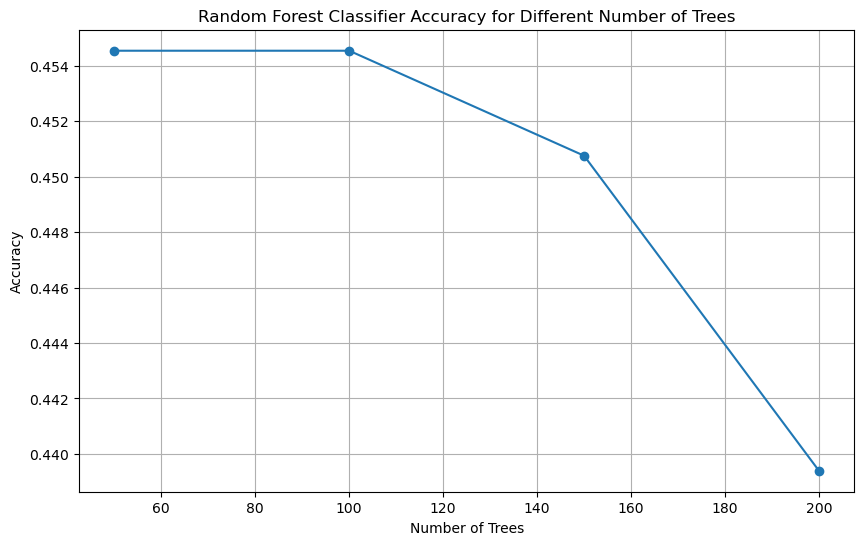

ValueError: y contains previously unseen labels: 'Yoga'

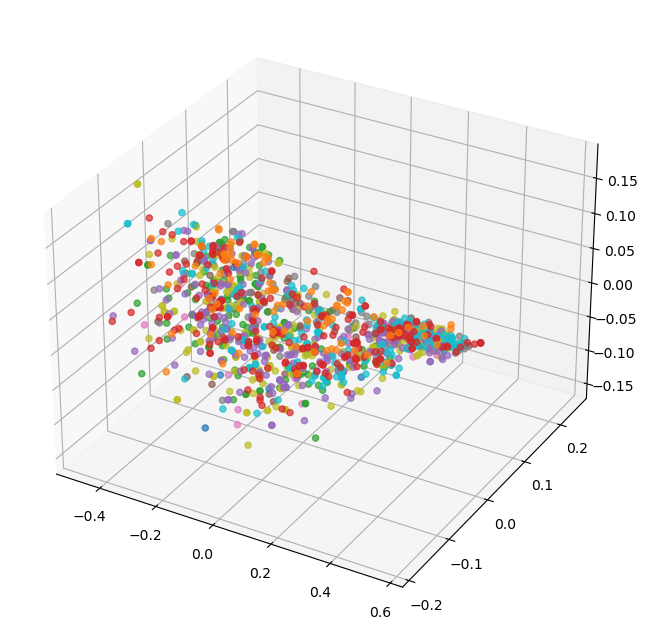

In [11]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import LabelEncoder
from tqdm import tqdm
from skimage import feature as sk_feature
import os

# Function to extract LBP features from an image
def extract_lbp_features(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    # Compute LBP features
    lbp = sk_feature.local_binary_pattern(gray, P=8, R=1, method='uniform')
    # Compute histogram of LBP and normalize
    hist, _ = np.histogram(lbp.ravel(), bins=np.arange(0, 59), range=(0, 58))
    hist = hist.astype("float")
    hist /= (hist.sum() + 1e-7)
    return hist

# Your dataset directory containing labeled subfolders
dataset_dir = "D:\yoga_new_dataset"

# Collect image paths and labels
image_paths, labels = [], []
for class_name in os.listdir(dataset_dir):
    class_dir = os.path.join(dataset_dir, class_name)
    for img_file in os.listdir(class_dir):
        img_path = os.path.join(class_dir, img_file)
        image_paths.append(img_path)
        labels.append(class_name)

# Encode labels
label_encoder = LabelEncoder()
encoded_labels = label_encoder.fit_transform(labels)

# Extract features from images
features = []
for img_path in tqdm(image_paths, desc="Extracting LBP Features"):
    img = cv2.imread(img_path)

    # Extract LBP features
    feature = extract_lbp_features(img)
    features.append(feature)

# Combine LBP features
X = np.array(features)

# Apply PCA for dimensionality reduction
pca = PCA(n_components=50)  # Adjust the number of components based on your dataset
X_pca = pca.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_pca, encoded_labels, test_size=0.2, random_state=42)

# Train a Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)

# Calculate accuracy and print classification report
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:\n", classification_report(y_test, y_pred))

# Plot the accuracy graph for different values of the number of trees
n_trees_values = [50, 100, 150, 200]  # You can adjust the range based on your preference
accuracy_values = []

for n_trees in tqdm(n_trees_values, desc="Testing different values of the number of trees"):
    rf_classifier = RandomForestClassifier(n_estimators=n_trees, random_state=42)
    rf_classifier.fit(X_train, y_train)
    y_pred = rf_classifier.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_values.append(accuracy)

plt.figure(figsize=(10, 6))
plt.plot(n_trees_values, accuracy_values, marker='o')
plt.title('Random Forest Classifier Accuracy for Different Number of Trees')
plt.xlabel('Number of Trees')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()

# Plot the results in 3D with predictions
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

for label in np.unique(encoded_labels):
    indices = np.where(encoded_labels == label)
    ax.scatter(X_pca[indices, 0], X_pca[indices, 1], X_pca[indices, 2], label=label_encoder.classes_[label], alpha=0.7)

# Plot predicted yoga class in red
yoga_class = label_encoder.transform(['Yoga'])[0]
yoga_indices = np.where(y_pred == yoga_class)
ax.scatter(X_test[yoga_indices, 0], X_test[yoga_indices, 1], X_test[yoga_indices, 2], c='red', label='Predicted Yoga', alpha=0.7)

ax.set_title(f"PCA of LBP Features with Random Forest Classification - Accuracy: {accuracy:.2f}")
ax.set_xlabel("Principal Component 1")
ax.set_ylabel("Principal Component 2")
ax.set_zlabel("Principal Component 3")
ax.legend()

plt.show()


Extracting ORB Features: 100%|█████████████████████████████████████████████████████| 1318/1318 [00:30<00:00, 43.67it/s]


Accuracy (Random Forest): 0.3484848484848485


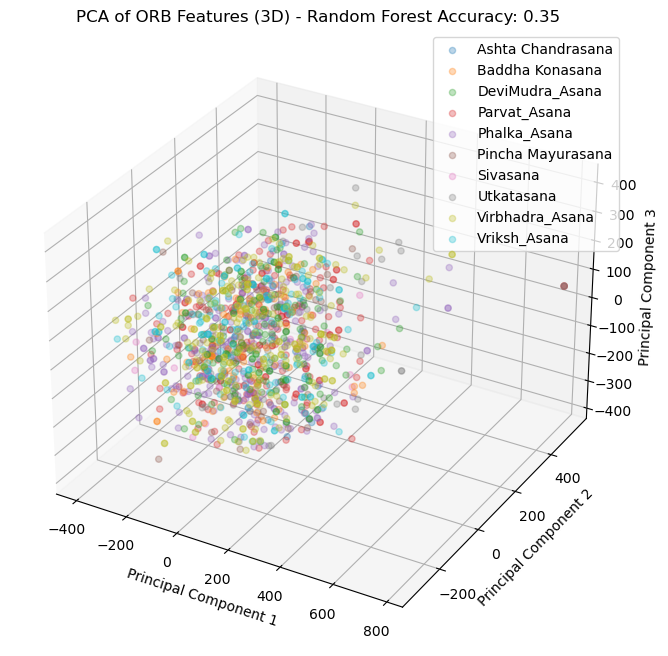

Testing different numbers of trees: 100%|████████████████████████████████████████████████| 5/5 [00:01<00:00,  3.76it/s]


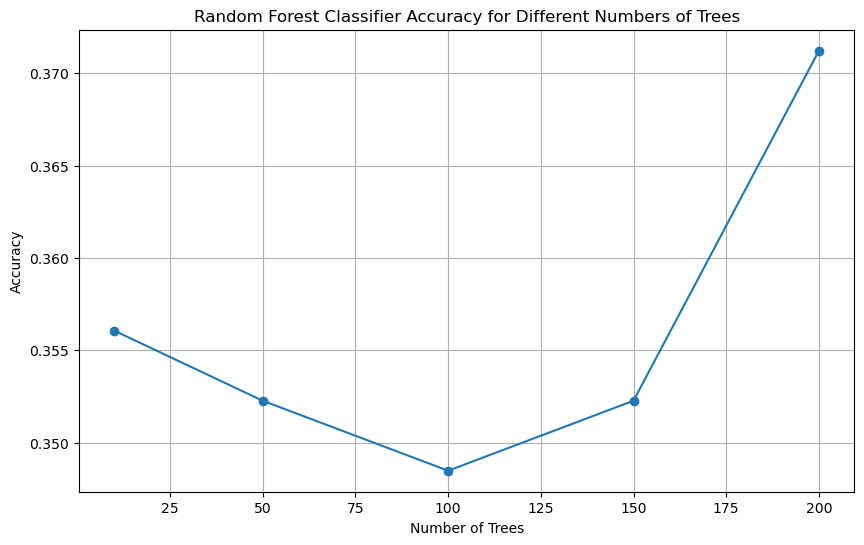

In [4]:
#ORB FEATURES
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import LabelEncoder
import os
from tqdm import tqdm

# Function to extract ORB features from an image
def extract_orb_features(image, target_length_orb):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    orb = cv2.ORB_create()
    keypoints, descriptors = orb.detectAndCompute(gray, None)

    # Check if keypoints are found
    if descriptors is not None:
        # Use the first 'target_length_orb' descriptors
        descriptors = descriptors.flatten()[:target_length_orb]

        # Pad or truncate the ORB feature vector to the specified length
        orb_feature = np.pad(descriptors, (0, target_length_orb - len(descriptors)))
        return orb_feature
    else:
        # Return a zero vector if no keypoints are found
        return np.zeros(target_length_orb)

# Your dataset directory containing labeled subfolders
dataset_dir = "D:\yoga_new_dataset"

# Specify the desired length for ORB feature vectors
orb_feature_length = 64  # You can adjust this value based on your requirements

# Collect image paths and labels
image_paths, labels = [], []
for class_name in os.listdir(dataset_dir):
    class_dir = os.path.join(dataset_dir, class_name)
    for img_file in os.listdir(class_dir):
        img_path = os.path.join(class_dir, img_file)
        image_paths.append(img_path)
        labels.append(class_name)

# Encode labels
label_encoder = LabelEncoder()
encoded_labels = label_encoder.fit_transform(labels)

# Extract features from images
features = []
for img_path in tqdm(image_paths, desc="Extracting ORB Features"):
    img = cv2.imread(img_path)

    # Extract ORB features with specified length
    feature = extract_orb_features(img, target_length_orb=orb_feature_length)
    features.append(feature)

# Combine ORB features
X = np.array(features)

# Apply PCA for dimensionality reduction to 3 components for 3D plot
pca = PCA(n_components=3)
X_pca_3d = pca.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_pca_3d, encoded_labels, test_size=0.2, random_state=42)

# Train a Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy (Random Forest):", accuracy)

# Plot the results in 3D with increased transparency and adjusted limits
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

for label in np.unique(encoded_labels):
    indices = np.where(encoded_labels == label)
    ax.scatter(X_pca_3d[indices, 0], X_pca_3d[indices, 1], X_pca_3d[indices, 2], label=label_encoder.classes_[label], alpha=0.3)  # Adjust alpha here

ax.set_title(f"PCA of ORB Features (3D) - Random Forest Accuracy: {accuracy:.2f}")
ax.set_xlabel("Principal Component 1")
ax.set_ylabel("Principal Component 2")
ax.set_zlabel("Principal Component 3")
ax.legend()

# Adjust the limits for better visualization
ax.set_xlim(X_pca_3d[:, 0].min(), X_pca_3d[:, 0].max())
ax.set_ylim(X_pca_3d[:, 1].min(), X_pca_3d[:, 1].max())
ax.set_zlim(X_pca_3d[:, 2].min(), X_pca_3d[:, 2].max())

plt.show()

tree_values = [10, 50, 100, 150, 200]  # You can adjust the range based on your preference
accuracy_values = []

for trees in tqdm(tree_values, desc="Testing different numbers of trees"):
    rf_classifier = RandomForestClassifier(n_estimators=trees, random_state=42)
    rf_classifier.fit(X_train, y_train)
    y_pred = rf_classifier.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_values.append(accuracy)

plt.figure(figsize=(10, 6))
plt.plot(tree_values, accuracy_values, marker='o')
plt.title('Random Forest Classifier Accuracy for Different Numbers of Trees')
plt.xlabel('Number of Trees')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()



Extracting ORB Features: 100%|█████████████████████████████████████████████████████| 1318/1318 [00:32<00:00, 40.96it/s]
C:\Users\Hp\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Hp\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Hp\anaconda3\lib

Accuracy: 0.24
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.16      0.16      0.16        19
           2       0.12      0.15      0.13        34
           3       0.24      0.27      0.26        45
           4       0.33      0.36      0.35        55
           5       0.00      0.00      0.00        13
           6       0.00      0.00      0.00         3
           7       0.00      0.00      0.00        15
           8       0.32      0.41      0.36        49
           9       0.18      0.10      0.12        31

    accuracy                           0.24       264
   macro avg       0.13      0.14      0.14       264
weighted avg       0.22      0.24      0.23       264



Testing different k values:   0%|                                                               | 0/20 [00:00<?, ?it/s]C:\Users\Hp\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Hp\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` 

C:\Users\Hp\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Hp\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to 

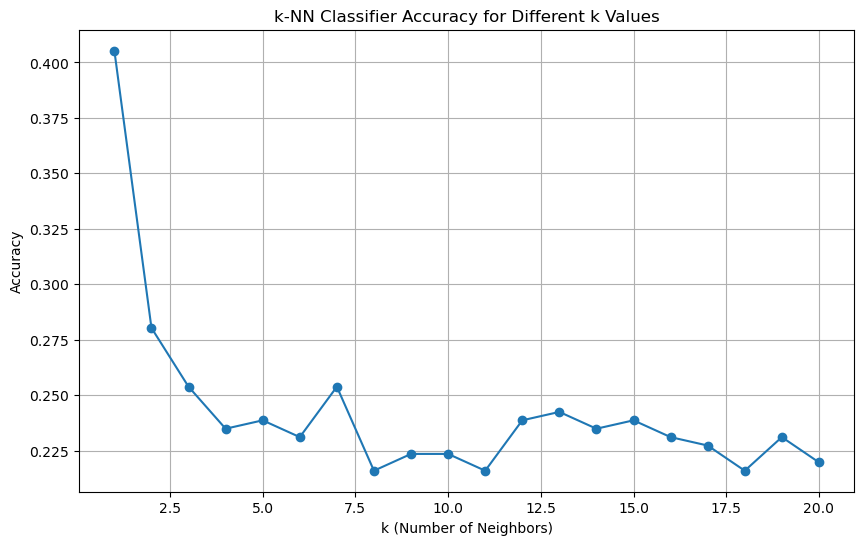

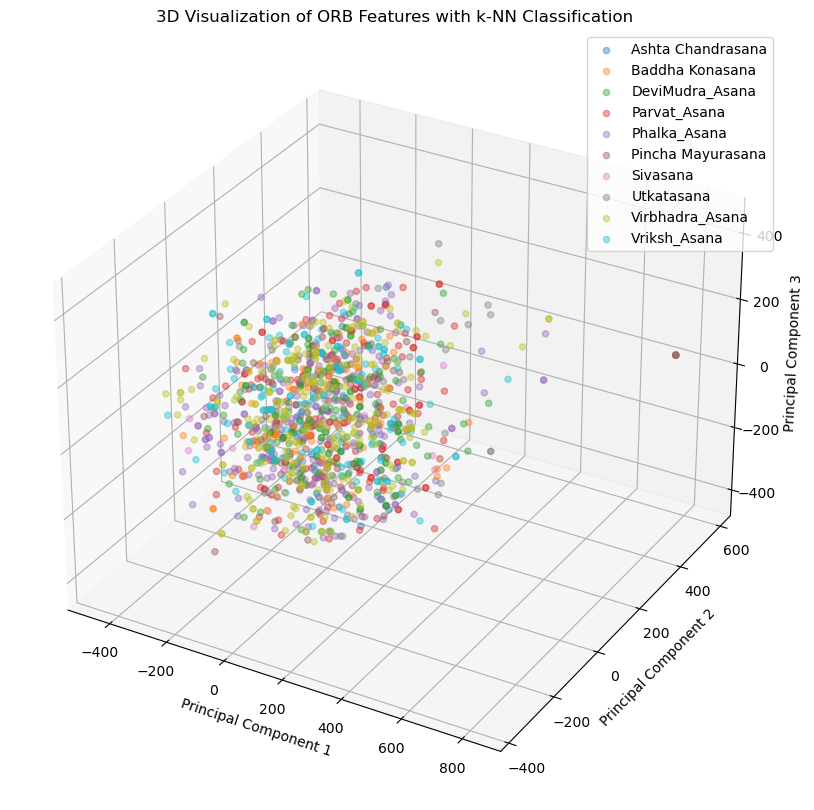

In [7]:
#orbusingknn
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from mpl_toolkits.mplot3d import Axes3D
from tqdm import tqdm
import os  # Don't forget to add this line

# Function to extract ORB features from an image
def extract_orb_features(image, target_length_orb):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    orb = cv2.ORB_create()
    keypoints, descriptors = orb.detectAndCompute(gray, None)

    # Check if keypoints are found
    if descriptors is not None:
        # Use the first 'target_length_orb' descriptors
        descriptors = descriptors.flatten()[:target_length_orb]

        # Pad or truncate the ORB feature vector to the specified length
        orb_feature = np.pad(descriptors, (0, target_length_orb - len(descriptors)))
        return orb_feature
    else:
        # Return a zero vector if no keypoints are found
        return np.zeros(target_length_orb)

# Your dataset directory containing labeled subfolders
dataset_dir = "D:\yoga_new_dataset"

# Specify the desired length for ORB feature vectors
orb_feature_length = 64

# Collect image paths and labels
image_paths, labels = [], []
for class_name in os.listdir(dataset_dir):
    class_dir = os.path.join(dataset_dir, class_name)
    for img_file in os.listdir(class_dir):
        img_path = os.path.join(class_dir, img_file)
        image_paths.append(img_path)
        labels.append(class_name)

# Encode labels
label_encoder = LabelEncoder()
encoded_labels = label_encoder.fit_transform(labels)

# Extract features from images
features = []
for img_path in tqdm(image_paths, desc="Extracting ORB Features"):
    img = cv2.imread(img_path)

    # Extract ORB features with specified length
    feature = extract_orb_features(img, target_length_orb=orb_feature_length)
    features.append(feature)

# Combine ORB features
X = np.array(features)

# Apply PCA for dimensionality reduction
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_pca, encoded_labels, test_size=0.2, random_state=42)

# Train kNN classifier
knn_classifier = KNeighborsClassifier(n_neighbors=5)
knn_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = knn_classifier.predict(X_test)

# Calculate accuracy and print classification report
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:\n", classification_report(y_test, y_pred))

# Plot the accuracy graph
k_values = list(range(1, 21))  # You can adjust the range based on your preference
accuracy_values = []

for k in tqdm(k_values, desc="Testing different k values"):
    knn_classifier = KNeighborsClassifier(n_neighbors=k)
    knn_classifier.fit(X_train, y_train)
    y_pred = knn_classifier.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_values.append(accuracy)

plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracy_values, marker='o')
plt.title('k-NN Classifier Accuracy for Different k Values')
plt.xlabel('k (Number of Neighbors)')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()

# Plot the 3D visualization of results
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

for label in np.unique(encoded_labels):
    indices = np.where(encoded_labels == label)
    ax.scatter(X_pca[indices, 0], X_pca[indices, 1], X_pca[indices, 2], label=label_encoder.classes_[label], alpha=0.4)

ax.set_title("3D Visualization of ORB Features with k-NN Classification")
ax.set_xlabel("Principal Component 1")
ax.set_ylabel("Principal Component 2")
ax.set_zlabel("Principal Component 3")
ax.legend()
plt.show()
